# Setup

In [1]:
!pip install ultralytics --quiet
!pip install roboflow --quiet
!pip install torch torchvision onnx onnx2keras tensorflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 85.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
import shutil
from google.colab import files
import torch
import os
import onnx
from onnx2keras import onnx_to_keras

In [4]:
HOME = os.getcwd()
print(HOME)

/content


# Data

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="omDBjHRrb9UFDvmRW9cb")
project = rf.workspace("augment-gkvan").project("skin-problems-detection")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Skin-Problems-Detection-9 in yolov8:: 100%|██████████| 3238/3238 [00:02<00:00, 1520.50it/s]


# 50-1024

In [7]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=1024 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 388MB/s]
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Skin-Problems-Detection-9/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1717285872.853ca489fba7.1823.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3520.jpg  weights
P_curve.png					    train_batch3521.jpg
PR_curve.png					    train_batch3522.jpg


/content


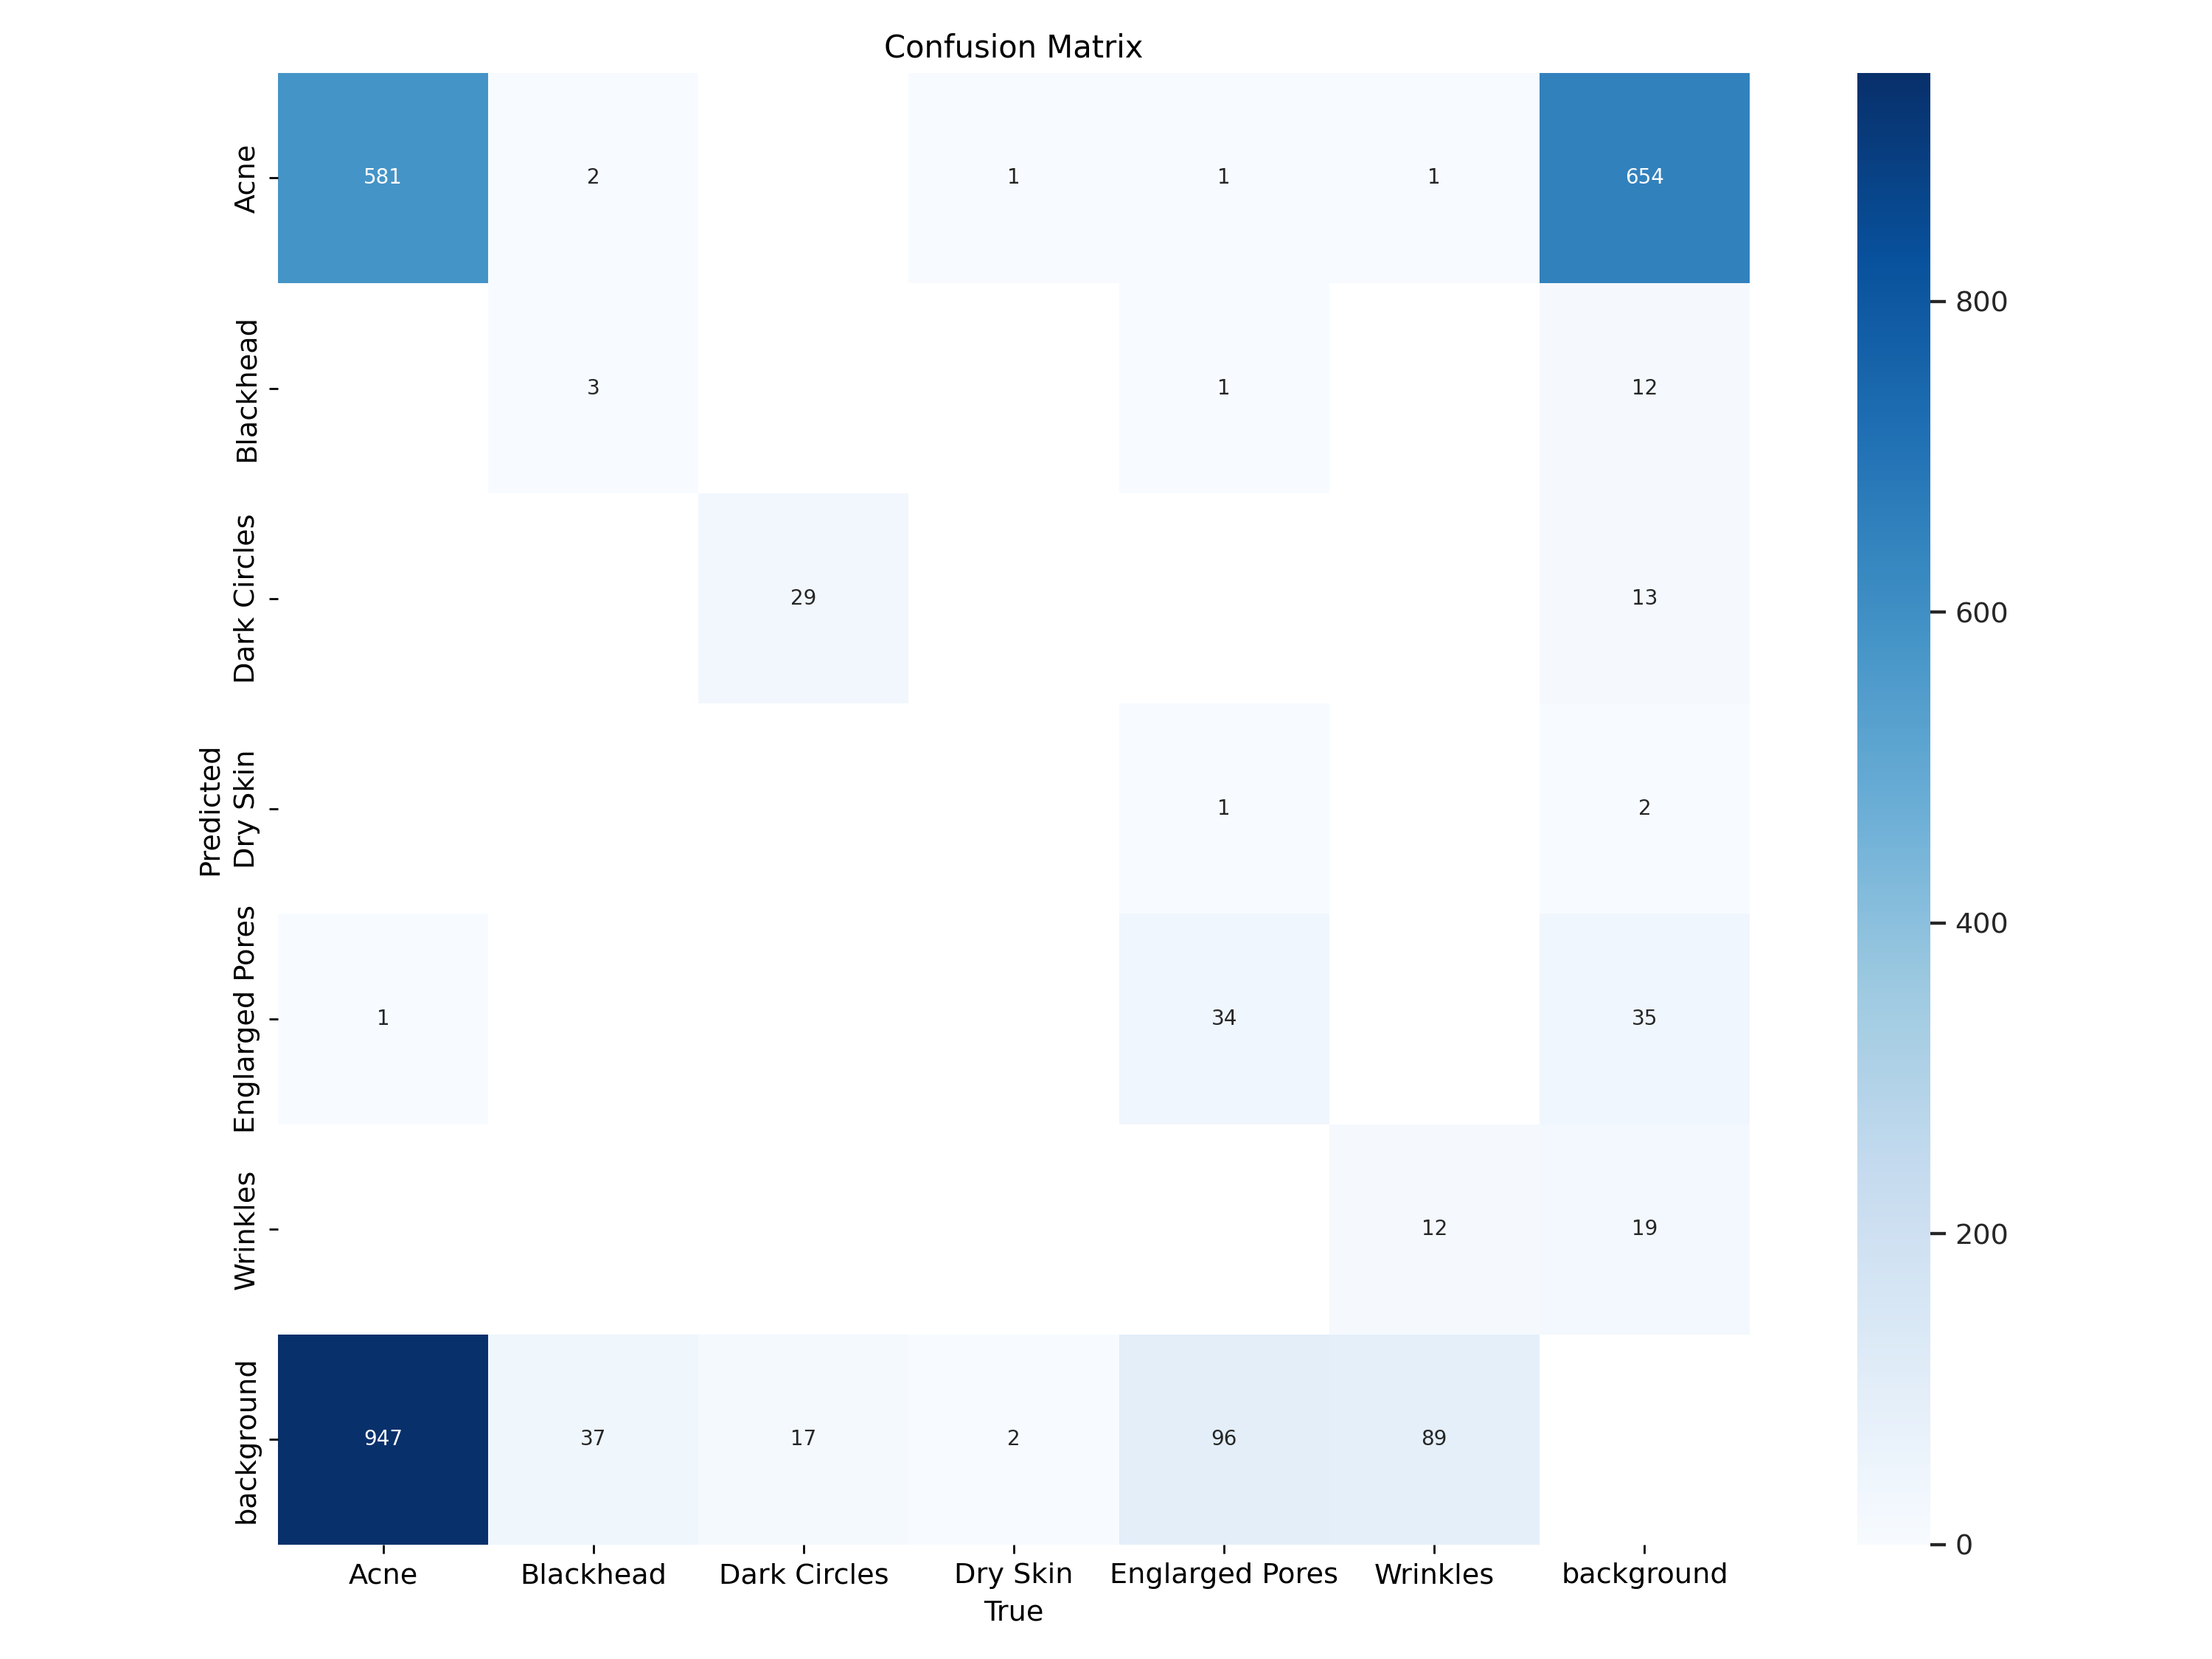

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [10]:
# data validasi
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Skin-Problems-Detection-9/valid/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100% 137/137 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:20<00:00,  2.24s/it]
                   all        137       1855      0.324      0.233      0.216     0.0818
                  Acne        128       1529      0.413      0.343      0.294     0.0867
             Blackhead         23         42      0.188     0.0714     0.0544     0.0195
          Dark Circles         28         46      0.636       0.63      0.611       0.28
              Dry Skin          3          3          0          0          0          0
       Englarged Pores         64        133        0.4      0.248      0.236     0.0716
              Wri

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/69 /content/datasets/Skin-Problems-Detection-9/test/images/108_jpg.rf.326dd5c8c5488c5515da1803cd8cbeb6.jpg: 1024x1024 4 Acnes, 1 Englarged Pores, 32.6ms
image 2/69 /content/datasets/Skin-Problems-Detection-9/test/images/11_jpg.rf.07d92630b0333834b76e402e9152c2dc.jpg: 1024x1024 4 Acnes, 32.7ms
image 3/69 /content/datasets/Skin-Problems-Detection-9/test/images/134_jpg.rf.d88e6307f513e2d0ed2fffc63d284c70.jpg: 1024x1024 1 Acne, 1 Englarged Pores, 32.7ms
image 4/69 /content/datasets/Skin-Problems-Detection-9/test/images/138_jpg.rf.b37b16a2ca1cb6099de240133baa8389.jpg: 1024x1024 7 Acnes, 1 Englarged Pores, 32.6ms
image 5/69 /content/datasets/Skin-Problems-Detection-9/test/images/140_jpg.rf.cb7c8b422db65b4d3d94c90a91ba4bad.jpg: 1024x1024 5 Acnes, 32.7ms
image 6/69 /content/datasets/Skin-Problems-Detection-9/te

## Export

In [12]:
folder_path = '/content/runs/detect/train/'
zip_path = '/content/D2M4_50_1024.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
best_model_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_model_path, 'D2M4_50_1024.pt')
files.download('D2M4_50_1024.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>